# IMPORTING NECESSARY LIBRARIES

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# READING CSV FILE

In [2]:
bank_df= pd.read_csv("bank-full.csv")

In [3]:
bank_df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


# READ THE CSV FILE WITH ";" AS THE DELIMITER

In [4]:
bank_df = pd.read_csv("bank-full.csv", delimiter=';')

In [5]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# CHECK FOR MISSING VALUES

In [6]:
print(bank_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# CHECKING INFO OF DATA

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# SUMMARY OF STATS

In [8]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# CORRELATION MATRIX

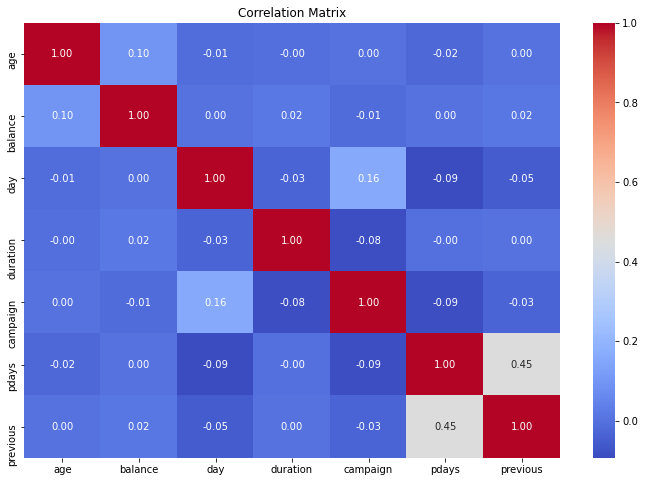

In [9]:
correlation_matrix = bank_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

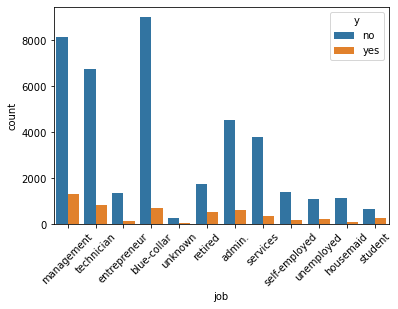

In [10]:
sns.countplot(x='job', data=bank_df, hue='y')
plt.xticks(rotation=45)
plt.show()


# DISTRIBUTION OF TARGET VARIABLE

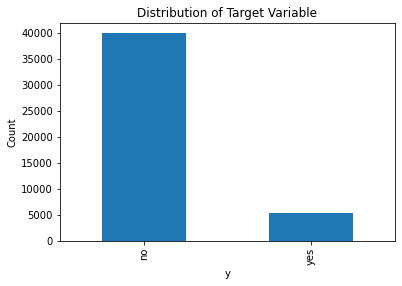

In [11]:

bank_df['y'].value_counts().plot(kind='bar')
plt.title("Distribution of Target Variable")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()

# DISTRIBUTION OF NUMERICAL COLUMNS

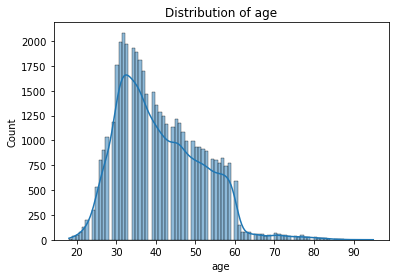

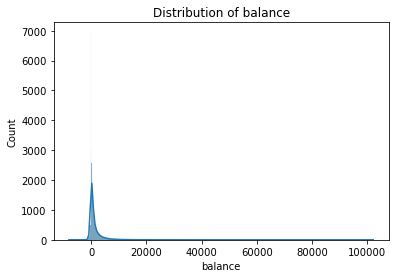

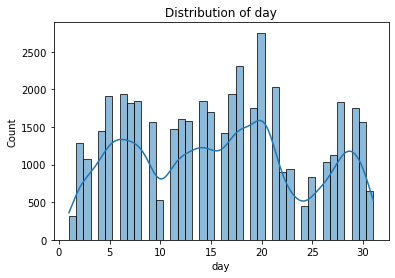

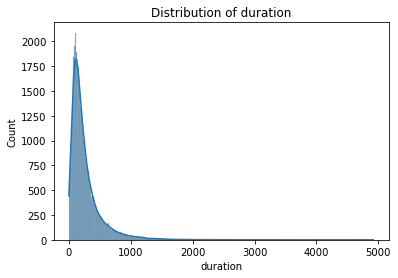

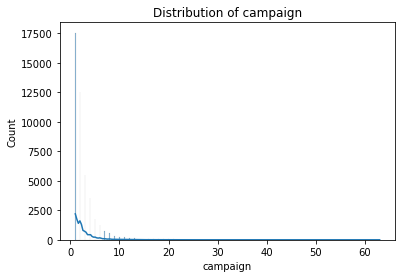

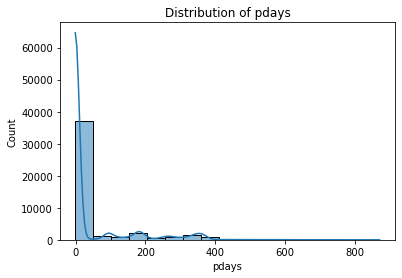

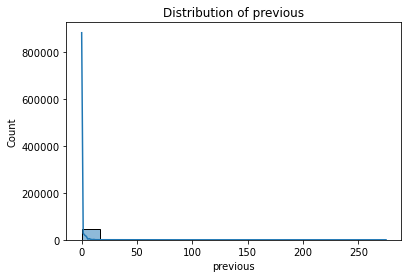

In [12]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    sns.histplot(bank_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


# CHECK FOR OUTLIERS IN NUMERICAL COLUMN AND VISUALIZE IT USING BOX PLOT

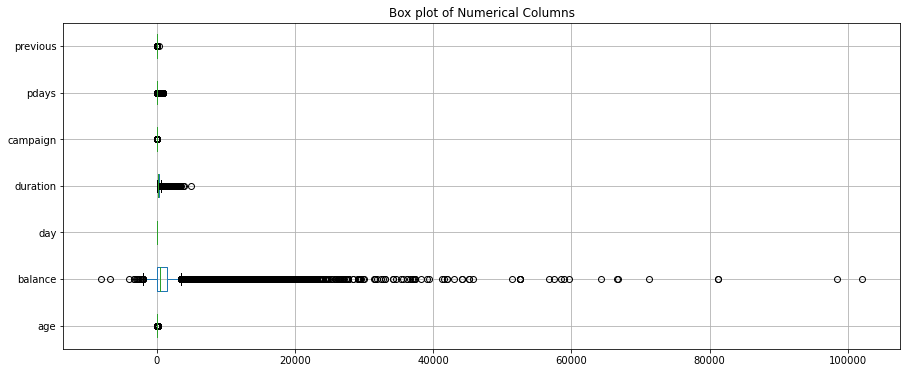

In [13]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


bank_df[numerical_columns].boxplot(vert=False, figsize=(15, 6))
plt.title("Box plot of Numerical Columns")
plt.show()

# HANDLE OUTLIERS USING Z SCORE NORMILZATION

In [14]:
z_scores = zscore(bank_df[numerical_columns])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# REPLACE OUTLIERS WITH NAN

In [15]:
bank_df.loc[outliers, numerical_columns] = pd.NA

# DISPLAY SUMMARY STATICTICS AFTER HANDLING OUTLIERS WITH IMPUTING NAN

In [16]:
print(bank_df[numerical_columns].describe())

          age  balance    day  duration  campaign  pdays  previous
count   45211    45211  45211     45211     45211  45211     45211
unique     77     7168     31      1573        48    559        41
top        32        0     20       124         1     -1         0
freq     2085     3514   2752       188     17544  36954     36954


In [17]:
print(bank_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# ENCODE CATEGORICAL VARIABLES USING ONE HOT ENCODING

In [18]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
bank_df_encoded = pd.get_dummies(bank_df, columns=categorical_columns, drop_first=True)

In [19]:
bank_df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,1,0,...,0,0,0,0,1,0,0,0,0,1


# ASSUMING 'Y' IS THE TARGET VARIABLE

In [20]:
X = bank_df_encoded.drop('y', axis=1)
y = bank_df_encoded['y']

# SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CREATE DECISION TREE CLASSIFIER AND TRAIN THE MODEL

In [22]:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5)

# MAKE PREDICTION ON THE TEST SET & EVALUATE THE ACCURACY

In [23]:
y_pred = dt_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.90


# CREATE RANDOM FOREST CLASSIFIER AND TRAIN THE MODEL

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


rf_classifier.fit(X_train, y_train)




RandomForestClassifier(max_depth=10, random_state=42)

# MAKE PREDICTION ON THE TEST SET & EVALUATE THE ACCURACY

In [25]:
y_rf_pred = rf_classifier.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.89


# CREATE SUPPORT VECTOR MACHINE (SVM) CLASSIFIER AND TRAIN THE MODEL

In [26]:
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, random_state=42))

svm_classifier.fit(X_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

# MAKE PREDICTION ON THE TEST SET & EVALUATE THE ACCURACY

In [27]:
y_svm_pred = svm_classifier.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_svm_pred)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.89


# ACCURACY COMPARISION

In [32]:
print("Accuracy Comparison")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_svm_pred))


Accuracy Comparison
Decision Tree Accuracy: 0.8973791883224593
Random Forest Accuracy: 0.8942828707287405
Support Vector Machine Accuracy: 0.8907442220502045


# CONFUSION MATRIX

In [36]:
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

print("\nConfusion Matrices:")
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Support Vector Machine Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Confusion Matrices:
Decision Tree Confusion Matrix:
 [[7753  199]
 [ 729  362]]
Random Forest Confusion Matrix:
 [[7881   71]
 [ 885  206]]
Support Vector Machine Confusion Matrix:
 [[7853   99]
 [ 889  202]]


# PRECISION, RECALL AND F1-SCORE

In [37]:
print("\nClassification Reports:")
print("Decision Tree:\n", classification_report(y_test, dt_predictions))
print("Random Forest:\n", classification_report(y_test, rf_predictions))
print("Support Vector Machine:\n", classification_report(y_test, svm_predictions))



Classification Reports:
Decision Tree:
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

Random Forest:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.74      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.82      0.59      0.62      9043
weighted avg       0.88      0.89      0.87      9043

Support Vector Machine:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62   